<a href="https://colab.research.google.com/github/sdjk14/urdu-characters-/blob/master/Another_copy_of_model22_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade tensorflow
import tensorflow as tf

import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

import os
import glob
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 26.2 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [2]:
!pip install git+https://github.com/jfilter/split-folders
import splitfolders

  Cloning https://github.com/jfilter/split-folders to /tmp/pip-req-build-4uk36fe6
  Running command git clone --filter=blob:none --quiet https://github.com/jfilter/split-folders /tmp/pip-req-build-4uk36fe6
  Resolved https://github.com/jfilter/split-folders to commit c566dbd56a1097e1ddba2de5dfb93bd67eade54f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for split_folders: filename=split_folders-0.5.1-py3-none-any.whl size=8400 sha256=2f6facb60a29342f59af07a8d7abf1e3448e214ffca4bdd07c17de34c1bb2d18
  Stored in directory: /tmp/pip-ephem-wheel-cache-nis8bf4x/wheels/2d/ec/49/cbd7e8e16af3dd90a0c7d38dd1fec6b8414732d2154a380283
Successfully built split_folders


In [3]:
'''os.makedirs('output')
os.makedirs('output/train')
os.makedirs('output/val')
splitfolders.ratio('super/',output='output',seed=121,ratio=(0.8, 0.2))'''

"os.makedirs('output')\nos.makedirs('output/train')\nos.makedirs('output/val')\nsplitfolders.ratio('super/',output='output',seed=121,ratio=(0.8, 0.2))"

In [4]:
image_width = 32
image_height = 32
train_path = 'output/train/'
test_path = 'output/val/'
epochs = 20
batch_size = 32
num_of_train_samples = 8000
num_of_test_samples = 2000

In [5]:
# Print the shape of a batch of data from the data generator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
import zipfile
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Step 1: Extract the zip file
zip_path = 'Sindhi dataset.zip'  # Replace with the actual zip file name
extract_dir = 'sindhi'
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Files extracted to {extract_dir}")

# Step 2: Verify the extracted files
for root, dirs, files in os.walk(extract_dir):
    print(f"Root: {root}")
    print(f"Directories: {dirs}")
    print(f"Files: {files}")
    print('----------------------------------------')

# Step 2.1: Check actual path after extraction
print("Checking extracted paths...")
for root, dirs, files in os.walk(extract_dir):
    print(f"Root: {root}")
    print(f"Directories: {dirs}")
    print(f"Files: {files}")
    print('----------------------------------------')

# Adjust paths based on the actual directory structure
train_path = os.path.join(extract_dir, 'Sindhi dataset')  # Adjust this to your specific folder structure
test_path = train_path  # Assuming test data is in the same directory for this example

print(f"Train path: {train_path}")
print(f"Test path: {test_path}")

if not os.path.isdir(train_path):
    raise FileNotFoundError(f"Directory does not exist: {train_path}")

# Step 3: Define the parameters
image_width, image_height = 150, 150
batch_size = 32
epochs = 20
num_of_train_samples = 8000
num_of_test_samples = 2000

# Step 4: Define the data generators
datagen = ImageDataGenerator(
    rescale=1. / 255,
    validation_split=0.2  # Use 20% of data for validation
)

train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(image_width, image_height),
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=batch_size,
    shuffle=True,
    subset='training'
)

test_generator = datagen.flow_from_directory(
    test_path,
    target_size=(image_width, image_height),
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=batch_size,
    shuffle=True,
    subset='validation'
)

# Get number of classes
num_classes = train_generator.num_classes
print(f"Number of classes: {num_classes}")

# Step 5: Define and compile the model
model = Sequential([
    Input(shape=(150, 150, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(16, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')  # Adjusted to match the number of classes in your dataset
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['categorical_accuracy'])

# Print model summary
model.summary()

# Step 6: Train the model
early_stopping = EarlyStopping(patience=5)

model.fit(train_generator,
          steps_per_epoch=num_of_train_samples // batch_size,
          epochs=epochs,
          validation_data=test_generator,
          validation_steps=num_of_test_samples // batch_size,
          callbacks=[early_stopping]
         )


Files extracted to sindhi
Root: sindhi
Directories: ['Sindhi dataset', 'sindhi']
Files: []
----------------------------------------
Root: sindhi/Sindhi dataset
Directories: ['47', '25', '1', '8', '34', '20', '17', '22', '40', '10', '33', '42', '13', '14', '3', '28', '6', '4', '49', '5', '46', '15', '38', '7', '41', '45', '11', '32', '18', '21', '16', '31', '36', '23', '19', '35', '30', '43', '39', '27', '24', '9', '50', '37', '29', '26', '2', '48']
Files: []
----------------------------------------
Root: sindhi/Sindhi dataset/47
Directories: []
Files: ['90(546).png', '91(2).png', '59(599).png', '87(366).png', '58(596).png', '90(101).png', '58(597).png', '80(525).png', '65(252).png', '90(610).png', '58(601).png', '83(505).png', '58(598).png', '80(364).png', '82(355).png', '91(14).png', '90(548).png', '90(611).png', '90(547).png', '80(523).png', '82(55).png', '90(43).png', '80(521).png', '90(7).png', '87(402).png', '60(54).png', '91(6).png', '66(251).png', '89(749).png', '80(637).png', '

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 148, 148, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 72, 72, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 36, 36, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 20736)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       2,654,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 48)                  │           6,192 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,665,472 (10.17 MB)

 Trainable params: 2,665,472 (10.17 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 59/250 ━━━━━━━━━━━━━━━━━━━━ 2:27 772ms/step - categorical_accuracy: 0.1185 - loss: 3.5445

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


250/250 ━━━━━━━━━━━━━━━━━━━━ 57s 211ms/step - categorical_accuracy: 0.1899 - loss: 3.1586 - val_categorical_accuracy: 0.3390 - val_loss: 2.4408
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 53s 204ms/step - categorical_accuracy: 0.5300 - loss: 1.5613 - val_categorical_accuracy: 0.4094 - val_loss: 2.1618
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 55s 213ms/step - categorical_accuracy: 0.7398 - loss: 0.8759 - val_categorical_accuracy: 0.4158 - val_loss: 2.3487
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 77s 191ms/step - categorical_accuracy: 0.8534 - loss: 0.4790 - val_categorical_accuracy: 0.4371 - val_loss: 2.4833
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 195ms/step - categorical_accuracy: 0.9035 - loss: 0.3238 - val_categorical_accuracy: 0.4435 - val_loss: 2.6966
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 50s 192ms/step - categorical_accuracy: 0.9418 - loss: 0.1958 - val_categorical_accuracy: 0.4371 - val_loss: 2.9617
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 55s 210ms/step - categorical_accuracy: 0.

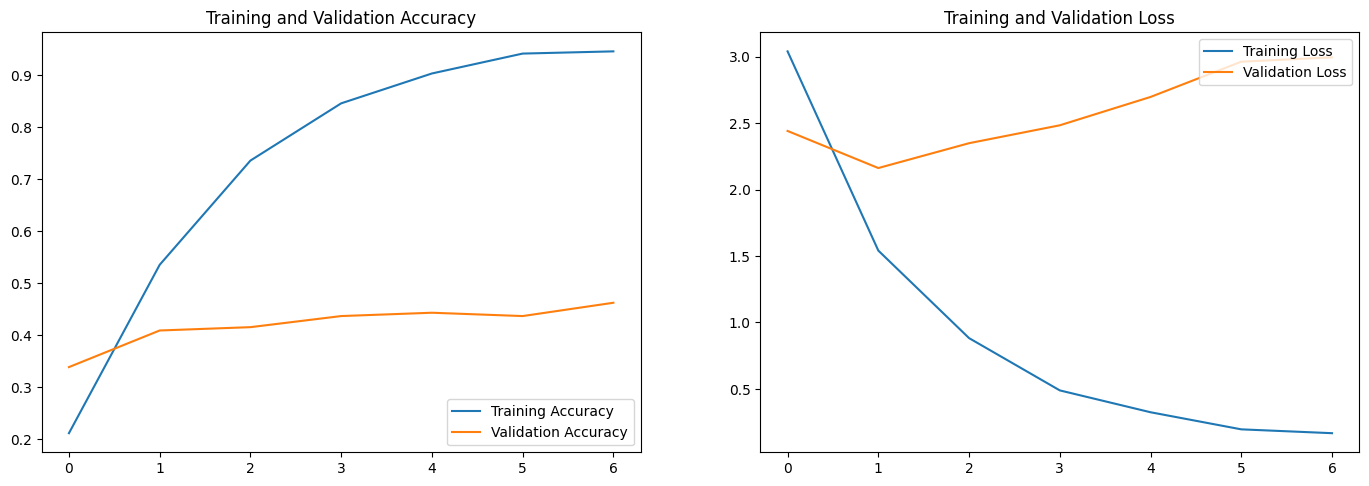

In [16]:
import matplotlib.pyplot as plt
acc = model.history.history['categorical_accuracy']
val_acc = model.history.history['val_categorical_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

plt.figure(figsize=(17, 12))
plt.subplot(2, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
test_generator1 = ImageDataGenerator()
test_data_generator = test_generator1.flow_from_directory(
    test_path, # Put your path here
    target_size=(150, 150),
    color_mode='grayscale',
    batch_size=32,
    shuffle=False)
import math

test_steps_per_epoch = math.ceil(test_data_generator.samples / test_data_generator.batch_size)


predictions = model.predict(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

Found 2351 images belonging to 48 classes.
74/74 ━━━━━━━━━━━━━━━━━━━━ 26s 358ms/step


In [18]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())

In [19]:
import numpy as np

# Assuming `true_classes` contains your true class labels
unique_classes = np.unique(true_classes)

# Creating class labels
class_labels = [f"Class_{i}" for i in unique_classes]

# Now you can use `class_labels` in the `classification_report` function
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)


              precision    recall  f1-score   support

     Class_0       0.94      0.96      0.95        50
     Class_1       0.74      0.84      0.79        50
     Class_2       0.79      0.88      0.83        50
     Class_3       0.92      0.92      0.92        50
     Class_5       0.82      0.82      0.82        50
     Class_6       1.00      0.94      0.97        50
     Class_7       0.93      0.82      0.87        50
     Class_8       0.87      0.82      0.85        50
     Class_9       0.65      0.94      0.77        50
    Class_10       0.87      0.82      0.85        50
    Class_11       0.86      0.72      0.78        50
    Class_12       0.97      0.78      0.87        50
    Class_13       0.90      0.54      0.68        50
    Class_14       0.92      0.70      0.80        50
    Class_15       0.79      0.88      0.83        50
    Class_16       0.87      0.90      0.88        50
    Class_17       1.00      0.86      0.92        50
    Class_18       0.87    

In [20]:
cf_matrix=confusion_matrix(true_classes,predicted_classes)
print(cf_matrix)

[[48  0  0 ...  0  0  0]
 [ 0 42  0 ...  3  0  0]
 [ 0  0 44 ...  0  0  1]
 ...
 [ 0  5  0 ... 38  0  0]
 [ 0  4  0 ...  9 13  0]
 [ 0  0  0 ...  0  0 48]]


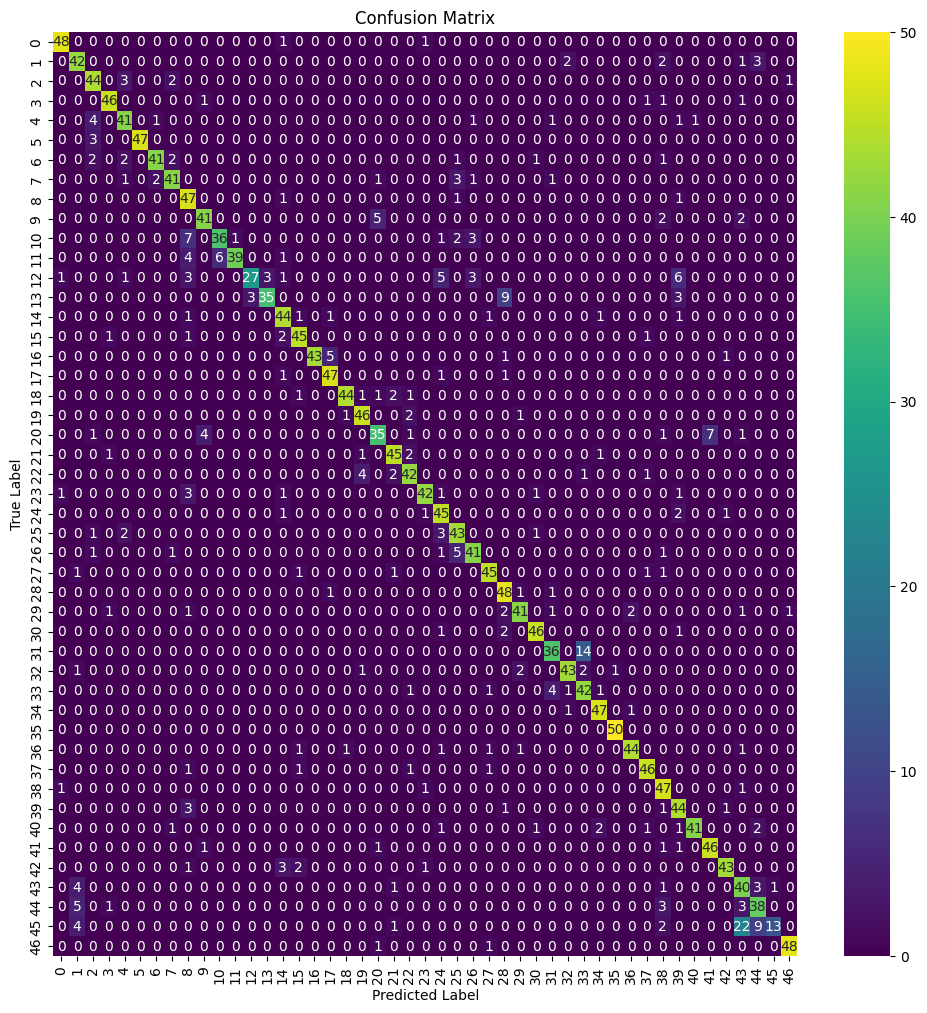

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(12, 12))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [22]:
from sklearn.metrics import classification_report

# Assuming test_labels and predicted_labels are defined with appropriate values
# test_labels = ...
# predicted_labels = ...

# Generate the classification report
report_dict = classification_report(true_classes, predicted_classes, labels=list(range(0,47)),
                                   target_names=class_labels, output_dict=True, zero_division=0)


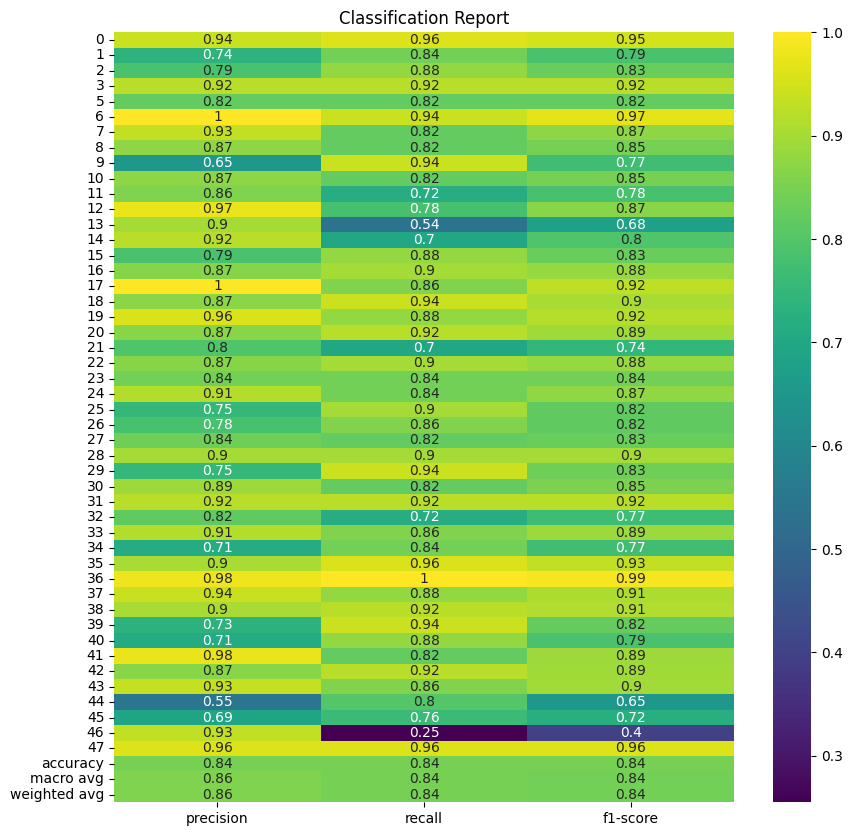

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Assuming you already have true labels and predicted labels
true_labels = test_data_generator.classes
predicted_classes = np.argmax(predictions, axis=1)

# Generate classification report
clf_report = classification_report(true_labels, predicted_classes, output_dict=True)

# Convert classification report to DataFrame
report_df = pd.DataFrame(clf_report).iloc[:-1, :].T

# Plot heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(report_df, annot=True, cmap='viridis')
plt.title('Classification Report')
plt.savefig('classification_report.jpeg')
plt.savefig('classification_report.png')
plt.show()


In [24]:
# Save the model in the native Keras format
model.save('my_model.keras')


In [25]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('my_model.keras')

# Recompile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Now you can use the model for prediction or further training



In [26]:

import tensorflow as tf
from tensorflow import keras
import numpy as np

try:
    path = r'E:\Dataset\Sindhi\train\18\{}.jpeg'.format(1)  # Adjust the format accordingly
    for i in range(len(prediction)):
        print(prediction[0] + 1)  # Adjust this line accordingly
        image = tf.keras.preprocessing.image.load_img(path, color_mode='grayscale')
        input_arr = keras.preprocessing.image.img_to_array(image)
        input_arr = np.array([input_arr])
        prediction = np.argmax(mymodel.predict(input_arr), axis=-1)
except:
    pass



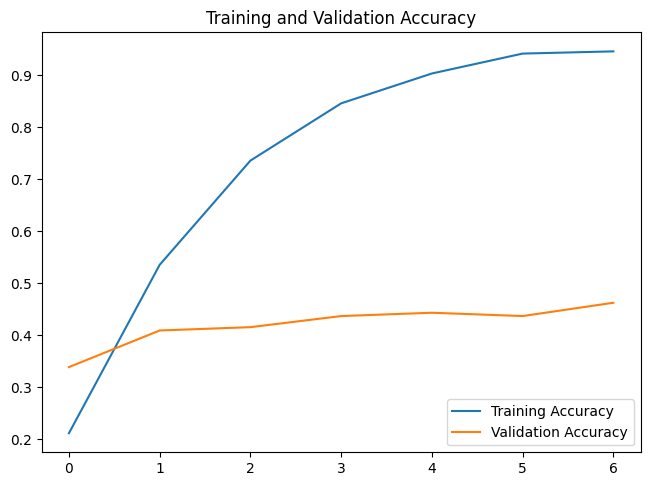

In [27]:

plt.figure(figsize=(17, 12))
plt.subplot(2, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.savefig('Training and Validation Accuracy.jpeg')
plt.savefig('Training and Validation Accuracy.jpeg')

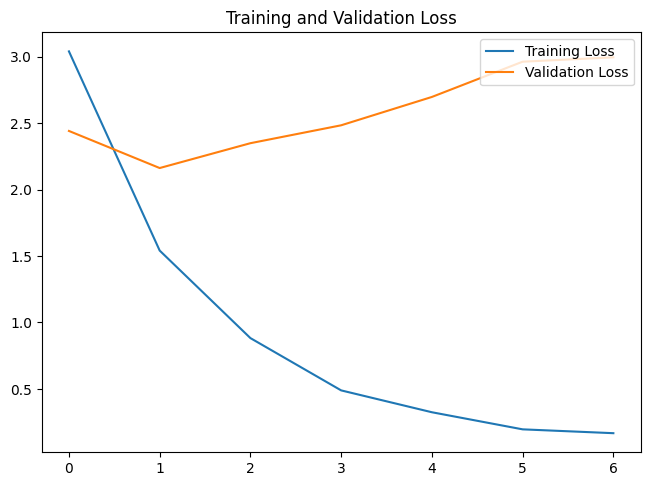

In [28]:
plt.figure(figsize=(17, 12))
plt.subplot(2, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('Training and Validation Loss')
plt.savefig('Training and Validation Loss.jpeg')

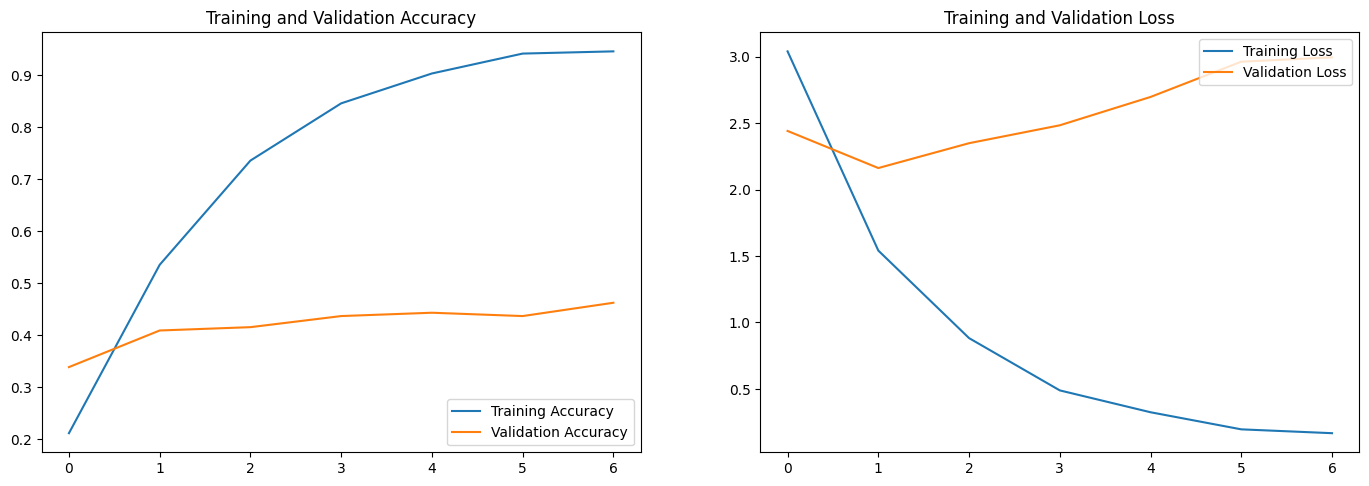

In [29]:
plt.figure(figsize=(17, 12))
plt.subplot(2, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('loss and accuracy.png')
plt.savefig('loss and accuracy.jpeg')